In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("matches.csv")

In [4]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
df.shape

(756, 18)

In [7]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [12]:
df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [14]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [15]:
df = df.drop(["umpire1", "umpire2", "umpire3"], axis = 1)

In [16]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [22]:
df.describe(include = "all")

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
count,756.000000,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756
unique,NaN,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41
top,NaN,NaN,Mumbai,2015-05-09,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens
freq,NaN,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77
mean,1792.178571,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN
std,3464.478148,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN
25%,189.750000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN
50%,378.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN
75%,567.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN


In [49]:
players_names = df.groupby(["team1","player_of_match"]).player_of_match.count()

In [57]:
players_names.to_frame()

player_of_match
team1               player_of_match                 
Chennai Super Kings A Nehra                        1
                    AB de Villiers                 1
                    AC Gilchrist                   2
                    AD Russell                     1
                    AM Rahane                      1
...                                              ...
Sunrisers Hyderabad UT Yadav                       1
                    V Kohli                        2
                    WP Saha                        1
                    YK Pathan                      1
                    Yuvraj Singh                   1

[529 rows x 1 columns]

In [61]:
player_of_matches = df[["season", "player_of_match"]]

In [62]:
player_of_matches

,season,player_of_match
0,2017,Yuvraj Singh
1,2017,SPD Smith
2,2017,CA Lynn
3,2017,GJ Maxwell
4,2017,KM Jadhav
...,...,...
751,2019,HH Pandya
752,2019,AS Yadav
753,2019,RR Pant
754,2019,F du Plessis


In [63]:
num_player_of_matches = player_of_matches.groupby(["season", "player_of_match"]).player_of_match.count()

In [65]:
num_player_of_matches.to_frame()

player_of_match
season player_of_match                 
2008   A Kumble                       1
       A Mishra                       1
       A Nehra                        1
       AC Gilchrist                   2
       BB McCullum                    1
...                                 ...
2019   SPD Smith                      1
       SR Watson                      2
       SS Iyer                        1
       V Kohli                        1
       VR Aaron                       1

[514 rows x 1 columns]

In [127]:
total_times_player_of_matches = player_of_matches["player_of_match"].value_counts()[0:12] 

In [128]:
total_times_player_of_matches

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
V Kohli           12
AM Rahane         12
Name: player_of_match, dtype: int64

In [131]:
pom_names = total_times_player_of_matches.keys()

In [132]:
pom_names

Index(['CH Gayle', 'AB de Villiers', 'DA Warner', 'MS Dhoni', 'RG Sharma',
       'YK Pathan', 'SR Watson', 'SK Raina', 'G Gambhir', 'MEK Hussey',
       'V Kohli', 'AM Rahane'],
      dtype='object')

Text(0.5, 1.0, 'Total times player of the match')

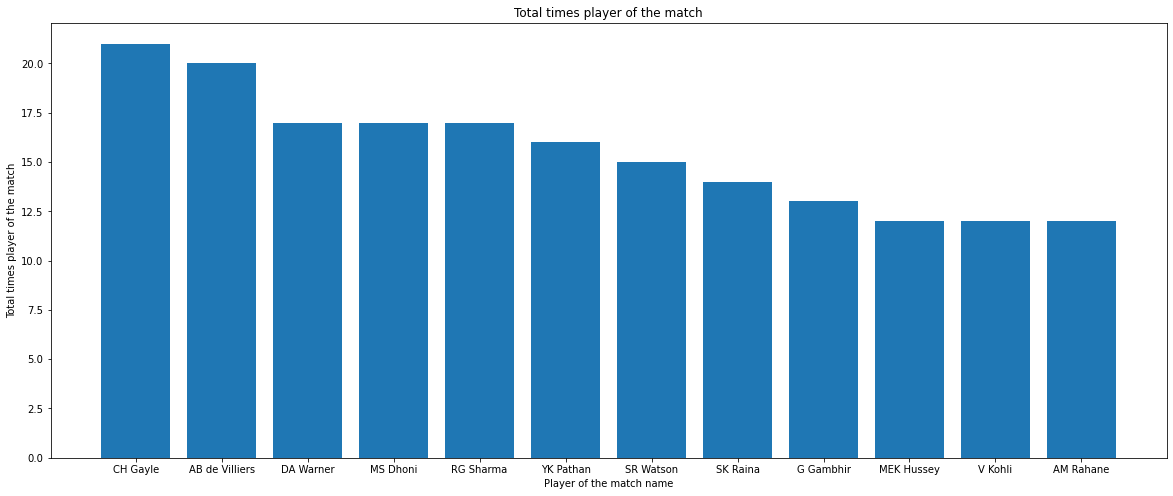

In [145]:
plt.figure(figsize = (20,8))
plt.bar(pom_names, total_times_player_of_matches)
plt.ylabel("Total times player of the match")
plt.xlabel("Player of the match name")
plt.title("Total times player of the match")

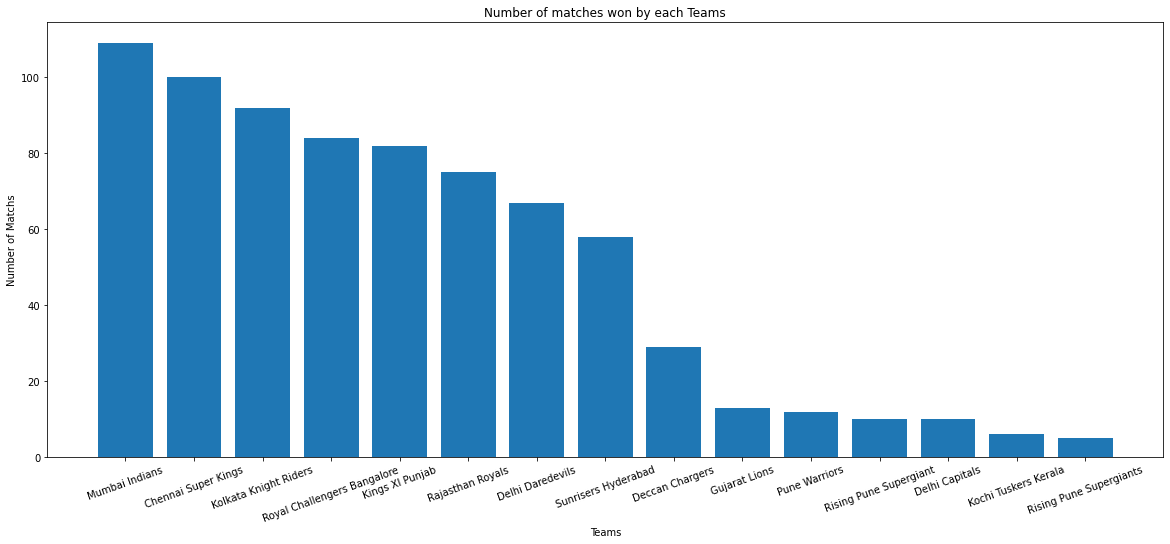

In [150]:
plt.figure(figsize = (20,8))
plt.bar(list(df['winner'].value_counts().keys()), df['winner'].value_counts())
plt.ylabel("Number of Matchs")
plt.xlabel("Teams")
plt.title("Number of matches won by each Teams")
plt.xticks(rotation = 20)
plt.show()

In [151]:
performance = df.pivot_table(index = ['winner','season'], aggfunc='size')
performance = pd.DataFrame(performance)

In [152]:
performance

0
winner              season    
Chennai Super Kings 2008     9
                    2009     8
                    2010     9
                    2011    11
                    2012    10
...                         ..
Sunrisers Hyderabad 2015     7
                    2016    11
                    2017     8
                    2018    10
                    2019     6

[100 rows x 1 columns]

In [153]:
performance.rename(columns={0:'wins'},inplace=True)

In [154]:
performance

wins
winner              season      
Chennai Super Kings 2008       9
                    2009       8
                    2010       9
                    2011      11
                    2012      10
...                          ...
Sunrisers Hyderabad 2015       7
                    2016      11
                    2017       8
                    2018      10
                    2019       6

[100 rows x 1 columns]

In [156]:
performance.reset_index(inplace=True)
MI = performance[performance['winner']=='Mumbai Indians']
CSK = performance[performance['winner'] == 'Chennai Super Kings']
KKR = performance[performance['winner']=='Kolkata Knight Riders']
RCB = performance[performance['winner']=='Royal Challengers Bangalore']

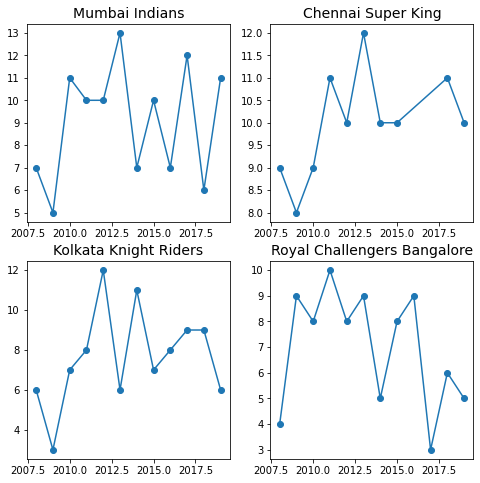

In [170]:
#Team performance with years
fig = plt.figure(figsize = (8, 8))

#plot1
plt.subplot(221)
plt.title('Mumbai Indians', fontsize=14)
plt.plot(MI['season'],MI['wins'],'-o')

#plot2
plt.subplot(222)
plt.title('Chennai Super King', fontsize=14)
plt.plot(CSK['season'],CSK['wins'],'-o')

#plot3
plt.subplot(223)
plt.title('Kolkata Knight Riders', fontsize=14)
plt.plot(KKR['season'],KKR['wins'],'-o')

#plot4
plt.subplot(224)
plt.title('Royal Challengers Bangalore', fontsize=14)
plt.plot(RCB['season'],RCB['wins'],'-o')

In [163]:
df2 = pd.read_csv("deliveries.csv")

In [164]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [168]:
df2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [169]:
df2.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [173]:
df2.match_id.unique()[0:5]

array([1, 2, 3, 4, 5], dtype=int64)

In [174]:
match_id_1 = df2[df2["match_id"] == 1]

In [175]:
match_id_1.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [176]:
match_id_1.shape

(248, 21)